<a href="https://colab.research.google.com/github/Sheim1278/CS229/blob/master/DAiSEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [ ]:
! pip install gdown

In [ ]:
!gdown 1yrk_wyhZ-c7q0Mcyyi888ylFkl_JDELi

Downloading...
From (original): https://drive.google.com/uc?id=1yrk_wyhZ-c7q0Mcyyi888ylFkl_JDELi
From (redirected): https://drive.google.com/uc?id=1yrk_wyhZ-c7q0Mcyyi888ylFkl_JDELi&confirm=t&uuid=28cb5e28-cd50-403c-8dec-b526da03e675
To: /content/DAiSEE.zip
100% 15.3G/15.3G [02:58<00:00, 85.6MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
shutil.move("/content/drive/MyDrive/DAiSEE.zip","/content/drive/MyDrive/student_engagment/")

'/content/drive/MyDrive/student_engagment/DAiSEE.zip'

In [ ]:
def extract_zipfile_except_subfolder(zip_file_path, target_folder, subfolder_to_exclude):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            # Skip files belonging to the specified subfolder
            if not file_info.filename.startswith(subfolder_to_exclude):
                # Extract the file to the target folder
                zip_ref.extract(file_info, target_folder)

# Example usage
zip_file_path = 'DAiSEE.zip'
target_folder = 'Dataset/'
subfolder_to_exclude = 'DAiSEE/DataSet/Train/210055/2100552061/'

try:
    # Create the target directory if it doesn't exist
   os.makedirs(target_folder, exist_ok=True)

    # Extract the entire folder contents except the specific subfolder
   extract_zipfile_except_subfolder(zip_file_path, target_folder, subfolder_to_exclude)

   print(f"Extraction excluding '{subfolder_to_exclude}' successful.")
except Exception as e:
    print(f"Extraction failed: {e}")

Extraction failed: [Errno 2] No such file or directory: 'DAiSEE.zip'


In [ ]:
def extract_specific_folder_except_file(zip_file_path, target_folder, folder_to_extract, file_to_exclude):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            # Check if the file belongs to the specified folder and is not the file to exclude
            if file_info.filename.startswith(folder_to_extract) and file_info.filename != os.path.join(folder_to_extract, file_to_exclude):
                # Extract the file to the target folder
                zip_ref.extract(file_info, target_folder)

# Example usage
zip_file_path = 'DAiSEE.zip'
target_folder = 'Dataset/'
folder_to_extract = 'DAiSEE/DataSet/Train/210055/2100552061/'
file_to_exclude = '2100552061.avi'

try:
    # Create the target directory if it doesn't exist
    os.makedirs(target_folder, exist_ok=True)

    # Extract the specific folder contents except the specified file
    extract_specific_folder_except_file(zip_file_path, target_folder, folder_to_extract, file_to_exclude)

    print(f"Extraction of '{folder_to_extract}' excluding '{file_to_exclude}' successful.")
except Exception as e:
    print(f"Extraction failed: {e}")

Extraction failed: [Errno 2] No such file or directory: 'DAiSEE.zip'


In [ ]:
 output_train_path = r"Output_Train_folder"
 class_0 = os.path.join(output_train_path, 'class_0')
 class_1 = os.path.join(output_train_path, 'class_1')
 class_2 = os.path.join(output_train_path, 'class_2')
 class_3 = os.path.join(output_train_path, 'class_3')
 os.makedirs(class_0, exist_ok=True)
 os.makedirs(class_1, exist_ok=True)
 os.makedirs(class_2, exist_ok=True)
 os.makedirs(class_3, exist_ok=True)

In [ ]:
y = " "
train_dataset_dir = "Dataset/DAiSEE/DataSet/Train"

In [ ]:
 source_path = "/content/Dataset/DAiSEE/DataSet/Train/110001/1100011004/1100011004.avi"
 destination_folder = "Dataset/DAiSEE/DataSet/Train/210055/2100552061/"
 shutil.copy(source_path, destination_folder)

FileNotFoundError: [Errno 2] No such file or directory: '/content/Dataset/DAiSEE/DataSet/Train/110001/1100011004/1100011004.avi'

In [ ]:
# video_path
video_paths = []
# video_name
vid_out_files = []
for file in os.listdir(train_dataset_dir):
    files = os.path.join(train_dataset_dir, file)
    for file_ in os.listdir(files):
        out_file = os.path.join(files, file_)
        for vid_out_file in os.listdir(out_file):
            video_file = os.path.join(out_file, vid_out_file)
            video_paths.append(video_file)
            vid_out_files.append(vid_out_file)
            # print(video_paths)
len(video_paths)

5484

In [ ]:
# Check if the list contains any null values
has_null = any(element is None for element in video_paths)

video_paths = [x for x in video_paths if x is not None]

if has_null:
    print("The list contains null values.")
else:
    print("The list does not contain null values.")


print(len(video_paths))

The list does not contain null values.
5484


In [ ]:
df = pd.read_csv("Dataset/DAiSEE/Labels/TrainLabels.csv")
print(df.head())

           ClipID  Boredom  Engagement  Confusion  Frustration 
0  1100011002.avi        0           2          0             0
1  1100011003.avi        0           2          0             0
2  1100011004.avi        0           3          0             0
3  1100011005.avi        0           3          0             0
4  1100011006.avi        0           3          0             0


In [ ]:
print(len(video_paths), len(df["ClipID"]))

5484 5358


In [ ]:
engagment_train = pd.DataFrame()
engagment_train["video_name"], engagment_train["Engagement"] = df["ClipID"], df["Engagement"]
engagment_train = engagment_train.sample(frac=1).reset_index(drop=True)

engagment_train["video_path"] = None
for i, x in enumerate(video_paths):
    for j in range(0, len(engagment_train['video_name'])):
        if vid_out_files[i] == engagment_train['video_name'][j]:
            print(vid_out_files[i], engagment_train['video_name'][j])
            engagment_train.loc[j, "video_path"] = video_paths[i]

        else:
            continue

print(engagment_train.head())

Streaming output truncated to the last 5000 lines.
1100051023.avi 1100051023.avi
1100051037.avi 1100051037.avi
1100051020.avi 1100051020.avi
1100051078.avi 1100051078.avi
1100051042.avi 1100051042.avi
1100051013.avi 1100051013.avi
1100051031.avi 1100051031.avi
2100581044.avi 2100581044.avi
2100581025.avi 2100581025.avi
2100582008.avi 2100582008.avi
2100581030.avi 2100581030.avi
2100582056.avi 2100582056.avi
2100582020.avi 2100582020.avi
2100582054.avi 2100582054.avi
2100582061.avi 2100582061.avi
2100581062.avi 2100581062.avi
2100581041.avi 2100581041.avi
2100581071.avi 2100581071.avi
2100581034.avi 2100581034.avi
2100581076.avi 2100581076.avi
2100581002.avi 2100581002.avi
2100582015.avi 2100582015.avi
2100581012.avi 2100581012.avi
2100581054.avi 2100581054.avi
2100581069.avi 2100581069.avi
2100581040.avi 2100581040.avi
2100582038.avi 2100582038.avi
2100581057.avi 2100581057.avi
2100581022.avi 2100581022.avi
2100581042.avi 2100581042.avi
2100582027.avi 2100582027.avi
2100582060.avi 2100

In [ ]:
print(len(engagment_train))

5358


In [ ]:
# check empty columns
engagment_train = engagment_train.dropna()

rows_with_none = engagment_train[engagment_train.isnull().any(axis=1)]
print(rows_with_none)

Empty DataFrame
Columns: [video_name, Engagement, video_path]
Index: []


2    2617
3    2494
1     213
0      34
Name: Engagement, dtype: int64


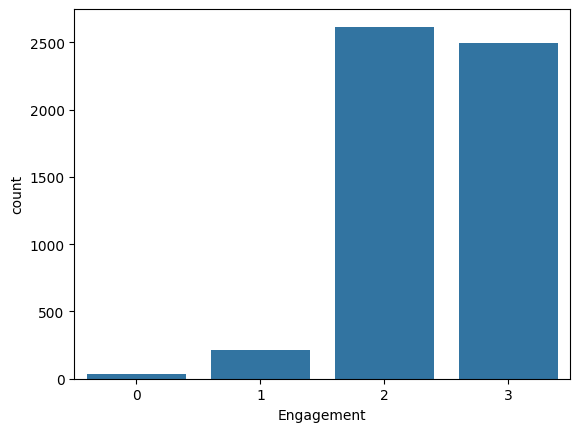

In [ ]:
sns.countplot(x=engagment_train["Engagement"])
print(engagment_train["Engagement"].value_counts())
plt.show()

(480, 640, 3)


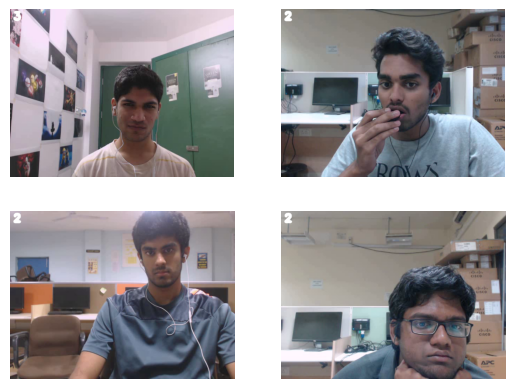

In [ ]:
import cv2
import random
# Generate a list of 20 random values. The values will be between 0-50,
# where 50 is the total number of class in the dataset.
random_range = random.sample(range(len(engagment_train["Engagement"])), 4)
shape_of_frames = tuple()
# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):
    video_reader = cv2.VideoCapture(engagment_train["video_path"][random_index])
    _, bgr_frame = video_reader.read()
    video_reader.release()
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
    cv2.putText(rgb_frame, str(engagment_train["Engagement"][random_index]), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1,
                (255, 255, 255), 8)
    plt.subplot(2, 2, counter);
    plt.imshow(rgb_frame);
    plt.axis('off')
    shape_of_frames = rgb_frame.shape
print(shape_of_frames)

In [ ]:
list_class_0 = []
list_class_1 = []
list_class_2 = []
list_class_3 = []
class_0_destination_folder = 'Output_Train_folder/class_0/'
class_1_destination_folder = 'Output_Train_folder/class_1/'
class_2_destination_folder = 'Output_Train_folder/class_2/'
class_3_destination_folder = 'Output_Train_folder/class_3/'

In [ ]:
import shutil
def create_class_file(class_number) :
    for i in range(len(engagment_train["Engagement"])) :
        if class_number == engagment_train['Engagement'][i] and class_number==0  :
            list_class_0.append(engagment_train["video_path"][i])
            shutil.copy(engagment_train["video_path"][i], class_0_destination_folder)


        elif class_number == engagment_train['Engagement'][i] and class_number==1  :
            list_class_1.append(engagment_train["video_path"][i])
            shutil.copy(engagment_train["video_path"][i], class_1_destination_folder)


        elif class_number == engagment_train['Engagement'][i] and class_number==2  :
            list_class_2.append(engagment_train["video_path"][i])
            shutil.copy(engagment_train["video_path"][i], class_2_destination_folder)


        elif class_number == engagment_train['Engagement'][i] and class_number==3  :
            list_class_3.append(engagment_train["video_path"][i])
            shutil.copy(engagment_train["video_path"][i], class_3_destination_folder)


create_class_file(0)
create_class_file(1)
create_class_file(2)
create_class_file(3)

In [ ]:
class_0_file = "Output_Train_folder//class_0/"
class_1_file = "Output_Train_folder//class_1/"
class_2_file = "Output_Train_folder//class_2/"
class_3_file = "Output_Train_folder//class_3/"

items_0 = os.listdir(class_0_file)
print(len(items_0))

items_1 = os.listdir(class_1_file)
print(len(items_1))

items_2 = os.listdir(class_2_file)
print(len(items_2))

items_3 = os.listdir(class_3_file)
print(len(items_3))

34
213
2617
2494
